In [3]:
import torch
from models.Generator import GeneratorModel
import numpy as np
import matplotlib.pyplot as plt  # Matplotlib을 사용하여 이미지를 시각화
from utils import _downscale

/tmp/ipykernel_158822/1253171178.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  generator.load_state_dict(torch.load(model_path))


Generated image shape: (1, 1, 128, 128)


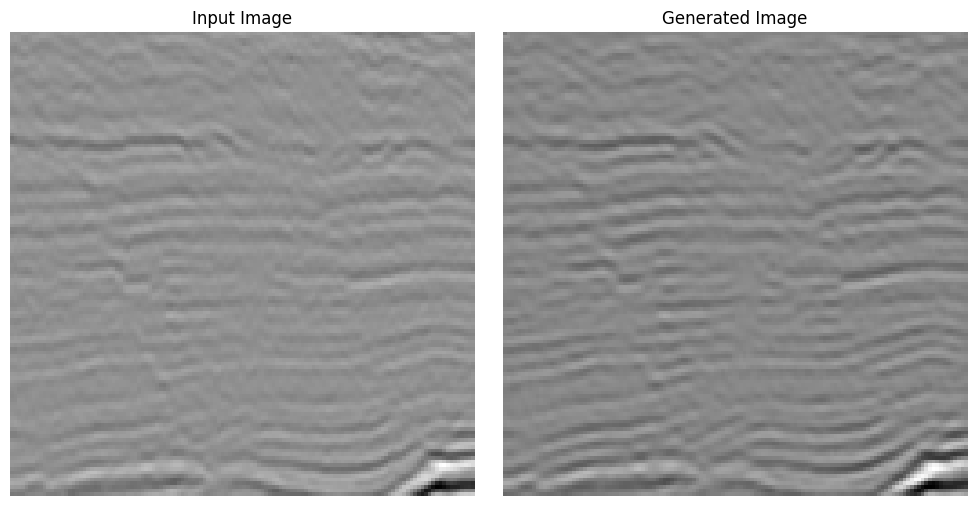

In [4]:
# 1. 모델 로드 및 평가 모드 설정
model_path = '/data2/generator_epoch_10.pth'  # 모델 경로 수정 (.pth 확장자)
generator = GeneratorModel(input_channels=1, output_channels=1)  # 모델 구조에 맞게 설정
generator.load_state_dict(torch.load(model_path))
generator.eval()  # 평가 모드로 전환

# 2. GPU 사용 가능 여부 확인 및 모델 이동
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator.to(device)

# 3. 입력 데이터 준비
test_input = np.load("/data2/seismic_HYUL/dataset/thebe_processed_128_64/train/seismic/00000011.npy")

# 입력 텐서로 변환 (채널 차원 추가: [1, 1, height, width])
test_input = torch.from_numpy(test_input).unsqueeze(0).unsqueeze(0).float().to(device)  # [1, 1, H, W] 형태로 변환

# 4. 추론 진행 (with torch.no_grad()로 기울기 비활성화)
with torch.no_grad():  # 추론 단계에서는 기울기 계산 불필요
    generated_image = generator(test_input)

# 5. 결과 출력 또는 저장
generated_image = _downscale(generated_image, 4)
generated_image = generated_image.cpu().numpy()  # 결과를 NumPy 배열로 변환 (GPU 사용 시 CPU로 이동)

print(f'Generated image shape: {generated_image.shape}')  # 예시로 출력

# 6. 결과 시각화
plt.figure(figsize=(10, 5))

# 입력 이미지 플롯
plt.subplot(1, 2, 1)
plt.imshow(test_input.cpu().numpy().squeeze(), cmap='gray')
plt.title('Input Image')
plt.axis('off')

# 생성된 이미지 플롯
plt.subplot(1, 2, 2)
plt.imshow(generated_image.squeeze(), cmap='gray')
plt.title('Generated Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# 필요하다면 결과를 후처리해서 저장
# np.save("output_image.npy", generated_image)  # 예시로 결과 저장
